In [1]:
# purpose: produce visuals for publication of hatchery releases over time.

In [ ]:
#don't forget to open Jupyter 'as administrator'
#import sys

#!{sys.executable} -m pip install plotly_express 
#!{sys.executable} -m pip install vega 
#!conda install --yes --prefix {sys.prefix} gdal #did not help (says already installed)
#!conda install --yes --prefix {sys.prefix} geopandas #worked
#!conda install --yes --prefix {sys.prefix} geoplot
#!conda install -c conda-forge geoplot #didn't work

In [1]:
import plotly_express as px
import pandas as pd
import altair as alt
import vega as v

In [5]:
releases = pd.read_csv("actual_releases_COORDS.csv",parse_dates=['RELEASE_YEAR'])
releases.columns

Index(['Unnamed: 0', 'AVE_WEIGHT', 'BIOMASS_MT', 'BROOD_YEAR',
       'COORD_SourceRound', 'END_DATE', 'END_DAY_REL', 'END_MO_REL',
       'END_YR_REL', 'FACILITY_NAME', 'FID', 'FINAL_LAT', 'FINAL_LON',
       'FeatureType', 'GAZETTED_NAME', 'LATITUDE_PSF', 'LAT_GLO', 'LAT_GLO_x',
       'LAT_GLO_y', 'LONGITUDE_PSF', 'LON_GLO', 'LON_GLO_x', 'LON_GLO_y',
       'MRP_TAGCODE', 'NEW_WATERSHED_CODE', 'NONZERO_MEAN_WEIGHT', 'NoTagClip',
       'NoTagNum', 'NoTagPartMarkNum', 'Note', 'PROGRAM_CODE', 'PROJ_NAME',
       'PURPOSE_CODE', 'REARING_TYPE_CODE', 'RELEASE_COMMENT',
       'RELEASE_SITE_NAME', 'RELEASE_SITE_NAME_G', 'RELEASE_SITE_NAME_x',
       'RELEASE_SITE_NAME_y', 'RELEASE_STAGE_NAME', 'RELEASE_YEAR',
       'REL_CU_INDEX', 'REL_CU_NAME', 'RUN_NAME', 'Release_Site', 'RowNum',
       'SOURCE', 'SPECIES_NAME', 'START_DATE', 'START_DAY_REL', 'START_MO_REL',
       'START_YR_REL', 'STOCK_CU_INDEX', 'STOCK_CU_NAME', 'STOCK_NAME',
       'STOCK_PROD_AREA_CODE', 'STOCK_TYPE_CODE', 'Shed

### Altair (with Vega) Libraries 
https://altair-viz.github.io/gallery/interactive_legend.html
https://altair-viz.github.io/gallery/multiline_tooltip.html

In [4]:
# notebook render
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [22]:
print("Note that RELEASE_REGION has 1600+ blanks in the records, so better to use STOCK_PROD_AREA_CODE to aggregate")

coho_releases = releases.loc[releases['SPECIES_NAME']=="Coho"]
chin_releases = releases.loc[releases['SPECIES_NAME']=="Chinook"]
print("In altair there is a 5000 record limit on data size. The length of the Coho table:")
print(len(coho_releases))
print("In altair there is a 5000 record limit on data size. The length of the Chinook table:")
print(len(chin_releases))

Not that RELEASE_REGION has 1600+ blanks in the records, so better to use STOCK_PROD_AREA_CODE to aggregate
In altair there is a 5000 record limit on data size. The length of the Coho table:
9631
In altair there is a 5000 record limit on data size. The length of the Chinook table:
4734


,Unnamed: 0,AVE_WEIGHT,BIOMASS_MT,BROOD_YEAR,COORD_SourceRound,END_DATE,END_DAY_REL,END_MO_REL,END_YR_REL,FACILITY_NAME,...,location_key2,name,notes,objectid,region,rmis_latitude,rmis_longitude,rpagency,source,submission
55,55,3.500000,0.002398,1979,NaN,19800924,24.0,9.0,1980,Three B Channel Inc,...,NaN,R-Chehalis R,NaN,13378.0,FRTH,49.2697,-121.9358,CDFO,G5,2019-02-04
56,56,14.300000,0.042786,1979,NaN,19810604,4.0,6.0,1981,Smokehouse H,...,NaN,R-Chehalis R,NaN,13378.0,FRTH,49.2697,-121.9358,CDFO,G5,2019-02-04
57,57,2.900000,0.001053,1980,NaN,19810624,24.0,6.0,1981,Smokehouse H,...,NaN,R-Weaver Sp Ch,NaN,13391.0,FRTH,49.3139,-121.8753,CDFO,G5,2019-02-04
404,404,0.963111,0.052201,1976,NaN,197708,NaN,8.0,1977,Cowichan River H,...,NaN,R-Cowichan R,NaN,12924.0,GST,48.7533,-123.6367,CDFO,G5,2019-02-04
405,405,11.303571,0.006104,1976,NaN,197808,NaN,8.0,1978,Cowichan River H,...,NaN,R-Cowichan R,NaN,12924.0,GST,48.7533,-123.6367,CDFO,G5,2019-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21446,21446,10.000000,0.022000,2001,NaN,20030630,30.0,6.0,2003,Yukalup Channel,...,Yukalup Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21447,21447,10.000000,0.022000,2002,NaN,20040630,30.0,6.0,2004,Yukalup Channel,...,Yukalup Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21448,21448,10.000000,0.022000,2003,NaN,20040630,30.0,6.0,2004,Yukalup Channel,...,Yukalup Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21449,21449,10.000000,0.022000,2004,NaN,20050630,30.0,6.0,2005,Yukalup Channel,...,Yukalup Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# for use elsewhere (ArcGIS Online Dashboard?)
releases_agg = releases.groupby(['SPECIES_NAME','STOCK_PROD_AREA_CODE','RELEASE_YEAR'])['TotalRelease','BIOMASS_MT'].sum().reset_index()
releases_agg.to_csv(r'Actual_Releases_Aggregated_fromNotebook2.csv', index = True)

coho_releases_agg = coho_releases.groupby(['STOCK_PROD_AREA_CODE','RELEASE_YEAR'])['TotalRelease','BIOMASS_MT'].sum().reset_index()
chin_releases_agg = chin_releases.groupby(['STOCK_PROD_AREA_CODE','RELEASE_YEAR'])['TotalRelease','BIOMASS_MT'].sum().reset_index()

In [ ]:
# note - altair encoding data types
#quantitative 	Q 	a continuous real-valued quantity
#ordinal 	O 	a discrete ordered quantity
#nominal 	N 	a discrete unordered category
#temporal 	T 	a time or date value
#geojson 	G 	a geographic shape

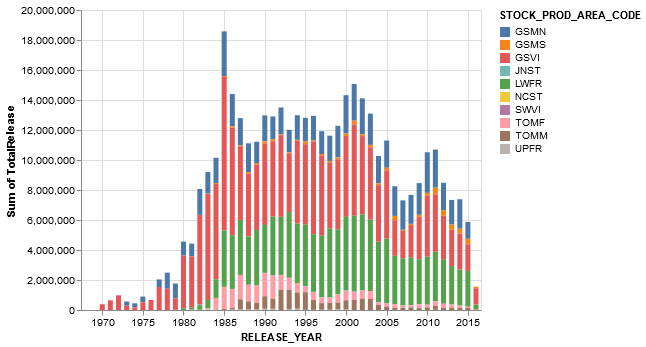

In [18]:
source = coho_releases_agg

alt.Chart(source).mark_bar().encode(
    x='RELEASE_YEAR',
    y='sum(TotalRelease)',
    color='STOCK_PROD_AREA_CODE'
)

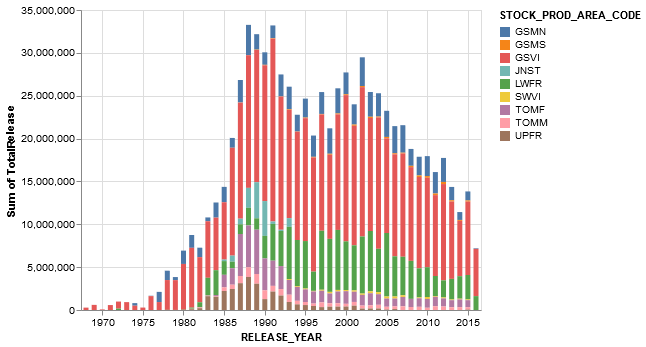

In [19]:
source = chin_releases_agg

alt.Chart(source).mark_bar().encode(
    x='RELEASE_YEAR',
    y='sum(TotalRelease)',
    color='STOCK_PROD_AREA_CODE'
)

In [ ]:
color3=alt.Color('StockName:O',
                   scale=alt.Scale(
            range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))

# for info about input dropdown
#https://altair-viz.github.io/user_guide/interactions.html
input_dropdown = alt.binding_select(options=['PS','SOG','FRTR','CR','JNST','WCVI','WA',
                    'null'])

selection = alt.selection_single(fields=['Location'], bind=input_dropdown, name='Location: ')

# other options for dropdown / filter
#input_dropdown2 = alt.binding_select(options=['stream','ocean','all','null'])

#selection2 = alt.selection_single(fields=['JuvenileTy'], bind=input_dropdown2, name='Juvenile Strat ')

base = alt.Chart(surv).mark_line().encode(
    x=alt.X('year(year)', title='year'),
    y=alt.Y('survival:Q',
            title='Survival (% to Age 2)',
            scale=alt.Scale(domain=(0, 0.5))),
    color=color3,
    detail='Stock:N').add_selection(selection).transform_filter(selection)

base